In [4]:
#Importing liberaries 
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.simplefilter("ignore")

In [5]:
#Loading the data file
df=pd.read_csv('dataz.csv')
df

,date,location,bedrooms,bathrooms,Area_Marla,price
0,5/17/2020,"D-12/3, D-12",8.0,8.0,24.0,120000000
1,11/17/2020,"D-12, Islamabad",5.0,5.0,4.4,26500000
2,3/17/2021,"D-12, Islamabad",4.0,5.0,5.0,29000000
3,4/17/2021,"D-12/2, D-12",8.0,8.0,24.0,110000000
4,4/17/2021,"D-12/1, D-12",4.0,4.0,4.0,29000000
...,...,...,...,...,...,...
297,2/17/2022,"D-12, Islamabad",2.0,2.0,4.0,95000000
298,2/17/2022,"D-12, Islamabad",2.0,2.0,4.0,15800000
299,2/17/2022,"D-12, Islamabad",3.0,4.0,4.4,25500000
300,2/17/2022,"D-12/2, D-12",7.0,8.0,8.0,70000000


In [6]:
# Convert Month into Datetime
df['date']=pd.to_datetime(df['date'])

In [7]:
#Indexing the 
df.set_index('date',inplace=True)

In [8]:
#Statistics of the data
df.describe()

,bedrooms,bathrooms,Area_Marla,price
count,246.000000,242.000000,302.00000,3.020000e+02
mean,5.154472,5.665289,8.67053,5.692228e+07
std,2.068352,2.151800,6.98033,3.368112e+07
min,2.000000,2.000000,3.30000,1.000000e+07
25%,4.000000,4.000000,4.00000,3.000000e+07
50%,5.000000,5.000000,7.00000,4.650000e+07
75%,6.000000,7.000000,10.00000,7.000000e+07
max,11.000000,10.000000,80.00000,1.650000e+08


In [9]:
#Types of columns
df.dtypes

location       object
bedrooms      float64
bathrooms     float64
Area_Marla    float64
price           int64
dtype: object

In [10]:
#looking for Null values we have zero nan values 
df.isnull().sum()

location       0
bedrooms      56
bathrooms     60
Area_Marla     0
price          0
dtype: int64

In [11]:
#Median of bedrooms 
import math
median_bedrooms =  math.floor(df['bedrooms'].median()) 
#Median of bathrooms
median_bathrooms =  math.floor(df['bathrooms'].median()) 

In [12]:
df['bedrooms'].fillna(median_bedrooms , inplace = True)
df['bathrooms'].fillna(median_bathrooms , inplace = True)

In [13]:
df.head()

,location,bedrooms,bathrooms,Area_Marla,price
date,,,,,
2020-05-17,"D-12/3, D-12",8.0,8.0,24.0,120000000
2020-11-17,"D-12, Islamabad",5.0,5.0,4.4,26500000
2021-03-17,"D-12, Islamabad",4.0,5.0,5.0,29000000
2021-04-17,"D-12/2, D-12",8.0,8.0,24.0,110000000
2021-04-17,"D-12/1, D-12",4.0,4.0,4.0,29000000


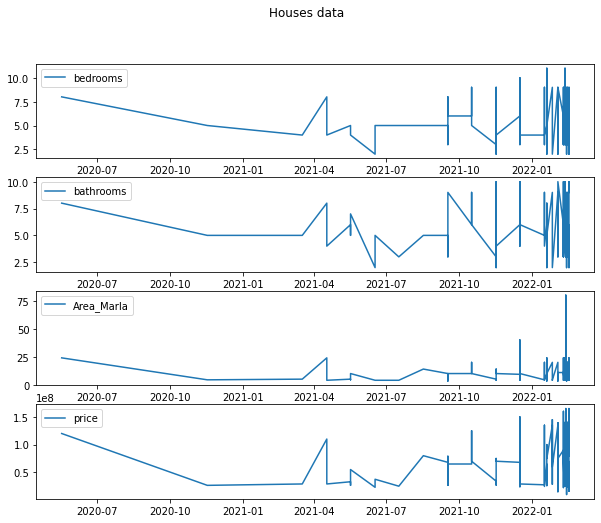

In [14]:
#Plotting the data
fig = plt.figure(figsize=(10,8))

plt.subplot(411)
plt.plot(df['bedrooms'], label='bedrooms')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df['bathrooms'], label='bathrooms')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df['Area_Marla'],label='Area_Marla')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df['price'], label='price')
plt.legend(loc='best')

fig.suptitle('Houses data')
plt.show()

In [27]:
#Decompose the data with the help of location column
df['location'].unique()

array(['D-12/3, D-12', 'D-12, Islamabad', 'D-12/2, D-12', 'D-12/1, D-12',
       'D-12/4, D-12', 'Karsaaz Villas, D-12', 'D-12 Markaz, D-12'],
      dtype=object)

In [16]:
#Selecting only D-12/3, D-12 area values 
newdf = df.loc[df['location'] == 'D-12/3, D-12']

In [17]:
#Now selecting onlt 4 marla houese 
newdf['Area_Marla'].unique()

array([24. ,  4. ,  5.6,  5. , 10. ,  8. , 20. ])

In [18]:
newdf1 = newdf.loc[newdf['Area_Marla'] == 4]

In [19]:
newdf1.index

DatetimeIndex(['2021-07-17', '2021-11-17', '2021-12-17', '2022-01-17'], dtype='datetime64[ns]', name='date', freq=None)

In [23]:
import pmdarima


In [43]:
y = newdf1['price']

In [44]:
from pmdarima import auto_arima
model = auto_arima(y, trace=True , d =0 , start.p = 1, start.q = 1 , max.p = 2, max.q = 2)
model.fit()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-44-0e157d7ee8e4>, line 2)

In [ ]:
#Fitting the model
lst_m=[[1,0,0],[1,1,0],[0,0,1]]
lst_ind=[]
lst_vals=[]
for i in range(len(lst_m)):
    
    model=ARIMA(newdf1['price'],order=(lst_m[i]))
    model_fit=model.fit()
    lst_vals.append(model_fit.aic)
    lst_ind.append(i)
    print(i)

In [ ]:
lst_vals

In [ ]:
#Plotting the price and model data
plt.figure(figsize=[15,5])
plt.xlabel('Date')
plt.title('Actual Vs Predictions')
plt.ylabel('Price')
plt.plot(newdf1['price'])
plt.plot(model_fit.fittedvalues, color='red')

In [ ]:
#Plotting and forecasting the price values 
model_fit.plot_predict(1,200) 
x1=model_fit.forecast(steps=11)

In [ ]:
#Future Values of future houses price
x1[0]

In [ ]:
#Evaluate the result using RMSE on trianing 
from sklearn.metrics import mean_squared_error 
import numpy as np
value1 = newdf1['price'] 
value2 = model_fit.fittedvalues
np.sqrt(mean_squared_error(value1,value2))

In [ ]:
lst=list(df['price'])
lst1=list(x1[0])


In [ ]:
for ls in lst1:
    res=round(ls)
    res=int(res)
    lst.append(res)

In [ ]:
lst_dates=list(newdf1.index)

In [ ]:
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [ ]:
date=lst_dates[-1]
for_dates=[]

for i in range(len(x1[0])): 
    date += timedelta(days=1)
    for_dates.append(date)
    print(date) 

In [ ]:
x=lst_dates
for_dates[0]=lst_dates[-1]
xle=len(newdf1['price'])


In [ ]:
plt.figure(figsize=(15,8))
plt.plot(for_dates,x1[0],marker="o")
plt.plot(lst_dates,newdf1['price'],marker="o")